<a href="https://colab.research.google.com/github/bonillahermes/Data_Science_Projects/blob/main/TecnicasBasicasIA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hermes Yate Bonilla
**Data Scientist**
---

**Contact:**
- **Email:** [bonillahermes@gmail.com](mailto:bonillahermes@gmail.com)
- **LinkedIn:** [linkedin.com/in/bonillahermes](https://www.linkedin.com/in/bonillahermes/)
- **GitHub:** [github.com/bonillahermes](https://github.com/bonillahermes)
- **Webpage:** [bonillahermes.com](https://bonillahermes.com/)
---

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 1. Laboratorio: Árboles de decisión, reglas y ensemble learning</header1></left>

## Importación de librerías necesarias

In [ ]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Cargar el Dataset

In [ ]:
#Código para cargar el Dataset
url = 'https://raw.githubusercontent.com/oscar-unir/TIA/main/datasets/car/Laboratorio_dataset_car.csv'

dataset = pd.read_csv(url, delimiter=';')


## Descripción del Problema
El problema involucra la clasificación de coches basada en distintos atributos relacionados con sus características y seguridad. El objetivo es categorizar cada coche en una de las cuatro clases de evaluación: inaceptable (`unacc`), aceptable (`acc`), bueno (`good`) o muy bueno (`vgood`). Esta clasificación se realiza considerando factores como el precio de compra, el costo de mantenimiento, el número de puertas, la capacidad de personas, el tamaño del maletero, y el nivel de seguridad.

## Tipo de Problema
Este es un problema de **clasificación supervisada** en el ámbito del aprendizaje automático. La justificación para esta categorización es:
- **Supervisada**: Existe una variable objetivo predefinida ('class') que queremos predecir, y el dataset proporciona ejemplos de entrada con las clasificaciones correspondientes.
- **Clasificación**: La variable objetivo es categórica y no continua, y el objetivo es asignar cada instancia a una de las categorías o clases predefinidas.

## Variable Objetivo y Variables de Entrada
- **Variable Objetivo**: 'class' - representa la clasificación del coche (inaceptable, aceptable, bueno, muy bueno).
- **Variables de Entrada**: 'Buying' (precio de compra), 'Maintenance' (costo de mantenimiento), 'Doors' (número de puertas), 'Person' (capacidad de personas), 'lug_boot' (tamaño del maletero), 'safety' (nivel de seguridad).

## Utilidad de su Posible Solución
La solución de este problema tiene múltiples utilidades:
- **Ayuda a los Consumidores**: Facilita la elección de coches basada en criterios objetivos, ayudando a los consumidores a tomar decisiones informadas.
- **Fabricantes de Coches**: Ofrece información valiosa para los fabricantes sobre qué características valoran más los consumidores.
- **Seguridad y Conformidad**: Puede ser utilizada para asegurar que los vehículos cumplan con ciertos estándares de seguridad y preferencias del mercado.

## Elementos Adicionales Relevantes
- **Equilibrio de Clases**: La distribución desigual de las clases puede afectar el rendimiento del modelo. Es esencial considerar técnicas para manejar el desequilibrio de clases.
- **Preprocesamiento de Datos**: Dado que todas las variables son categóricas, serán necesarias técnicas de codificación adecuadas para convertirlas en un formato utilizable por algoritmos de machine learning.
- **Evaluación del Modelo**: La elección de métricas adecuadas para evaluar el modelo es crucial, especialmente en un contexto de clases desequilibradas.


## Análisis del Dataset

### Clases de la Variable Objetivo
- **Número de Clases:** 4
- **Clases y Significado:**
  - `unacc`: Inaceptable
  - `acc`: Aceptable
  - `vgood`: Muy Bueno
  - `good`: Bueno

### Número Total de Instancias
- **Total de Instancias:** 1750

### Número de Instancias por Clase
- `unacc`: 1215 instancias
- `acc`: 390 instancias
- `good`: 75 instancias
- `vgood`: 70 instancias

### Atributos de Entrada
- **Número de Atributos:** 6
- **Detalles de los Atributos:**
  - `Buying`: Precio de compra (tipo: objeto)
  - `Maintenance`: Costo de mantenimiento (tipo: objeto)
  - `Doors`: Número de puertas (tipo: objeto)
  - `Person`: Capacidad de personas (tipo: objeto)
  - `lug_boot`: Tamaño del maletero (tipo: objeto)
  - `safety`: Nivel de seguridad (tipo: objeto)

### Valores de Atributos Desconocidos
- No hay valores desconocidos en los atributos.


In [ ]:
# 1. Descripción general del dataset
print("Descripción general del dataset:")
print(dataset.info())

# 2. Análisis estadístico básico
print("\nEstadísticas descriptivas:")
print(dataset.describe(include='all'))


Descripción general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1750 non-null   object
 1   Maintenance  1750 non-null   object
 2   Doors        1750 non-null   object
 3   Person       1750 non-null   object
 4   lug_boot     1750 non-null   object
 5   safety       1750 non-null   object
 6   class        1750 non-null   object
dtypes: object(7)
memory usage: 95.8+ KB
None

Estadísticas descriptivas:
       Buying Maintenance Doors Person lug_boot safety  class
count    1750        1750  1750   1750     1750   1750   1750
unique      4           4     4      3        3      3      4
top     vhigh         low     2      4      big   high  unacc
freq      443         447   444    587      585    590   1215


In [ ]:
# Número total de instancias
num_instances = len(dataset)

# Número de atributos (excluyendo la variable objetivo)
num_attributes = dataset.shape[1] - 1

# Distribución de las clases en la variable objetivo
class_distribution = dataset['class'].value_counts()

# Verificación de valores faltantes
missing_values = dataset.isnull().sum()

# Mostrando los resultados
print("Número total de instancias:", num_instances)
print("Número de atributos:", num_attributes)
print("\nDistribución de clases en la variable objetivo 'class':")
print(class_distribution)
print("\nValores faltantes en cada columna:")
print(missing_values)


Número total de instancias: 1750
Número de atributos: 6

Distribución de clases en la variable objetivo 'class':
unacc    1215
acc       390
good       75
vgood      70
Name: class, dtype: int64

Valores faltantes en cada columna:
Buying         0
Maintenance    0
Doors          0
Person         0
lug_boot       0
safety         0
class          0
dtype: int64


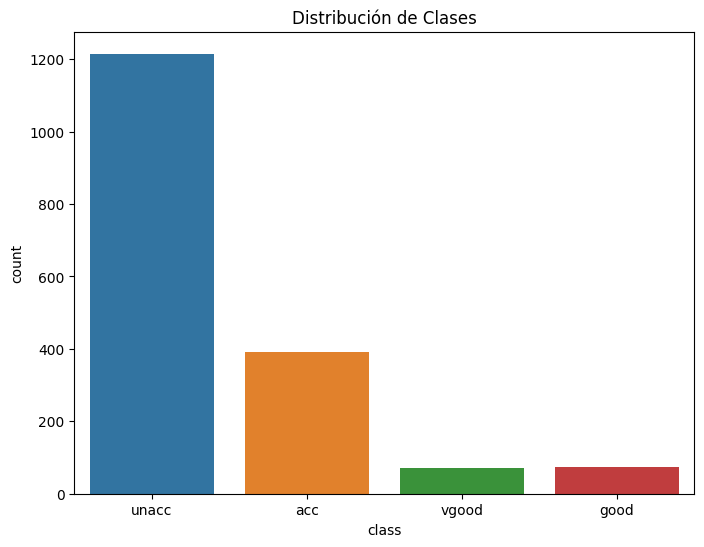

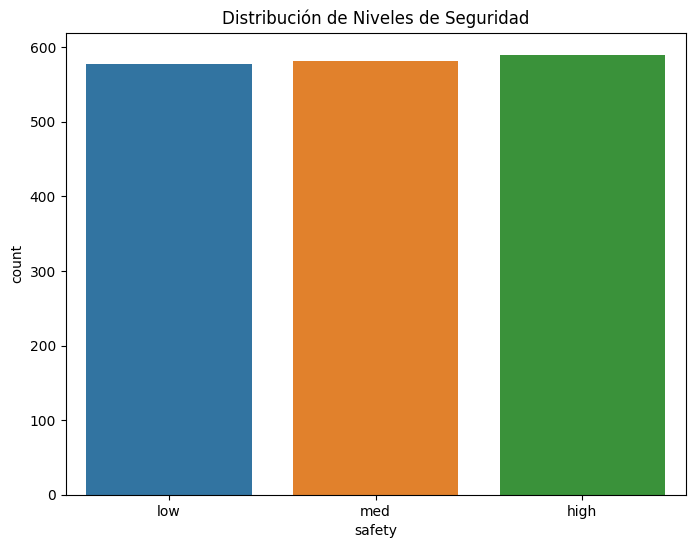

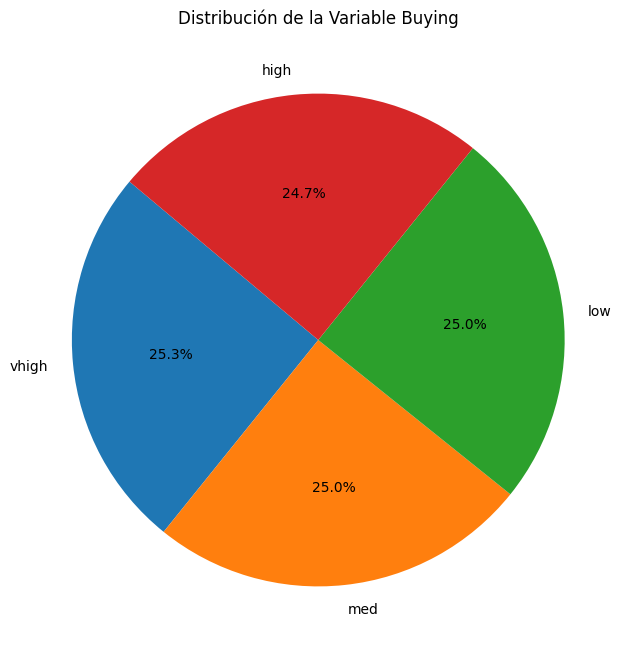

In [ ]:
# 1. Gráfico de barras para la distribución de clases
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='class')
plt.title('Distribución de Clases')
plt.show()

# 2. Gráfico de barras para los niveles de seguridad
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='safety')
plt.title('Distribución de Niveles de Seguridad')
plt.show()

# 3. Gráfico de torta para la distribución de la variable 'Buying'
buying_counts = dataset['Buying'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(buying_counts, labels=buying_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de la Variable Buying')
plt.show()


## Resumen de Hallazgos Descriptivos del Dataset 'Laboratorio_dataset_car'

- **Dataset y Atributos:**
  - El dataset comprende **1750 instancias** con **7 atributos** cada una, todos de tipo objeto, lo que sugiere que son categóricos.
  - Las columnas son 'Buying', 'Maintenance', 'Doors', 'Person', 'lug_boot', 'safety', y 'class'.

- **Variable Objetivo 'class':**
  - Hay cuatro categorías en 'class': 'unacc' (inaceptable), 'acc' (aceptable), 'good' (bueno), y 'vgood' (muy bueno).
  - Predominancia de la clase 'unacc', seguida por 'acc', con 'good' y 'vgood' en menor número.

- **Integridad de Datos:**
  - No se encontraron **valores faltantes o desconocidos** en ninguna columna.

- **Preprocesamiento Necesario:**
  - Se destaca la importancia del **preprocesamiento de datos**, especialmente la codificación de variables categóricas, para su uso en algoritmos de aprendizaje automático.

Este análisis proporciona una base para la comprensión inicial del dataset y la planificación de pasos futuros en la preparación de datos y selección de modelos de clasificación.


## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [ ]:
# Separando las características y la variable objetivo
X = dataset.drop('class', axis=1)
y = dataset['class']

# Aplicando One-Hot Encoding a las variables categóricas
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## División del dataset en datos de entrenamiento y datos de test

In [ ]:
# Dividiendo el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Ahora X_train y y_train contienen los datos de entrenamiento,
# mientras que X_test y y_test contienen los datos de prueba.

# El dataset está ahora listo para ser utilizado en modelos de aprendizaje automático


# Ajuste de los modelos


## Árbol de Decisión (Decision Tree Classifier)

- **Intuitivo y Fácil de Interpretar**: Los árboles de decisión son modelos muy intuitivos y fáciles de entender. La estructura del árbol permite visualizar claramente cómo se toman las decisiones, lo que es útil para la interpretación y explicación del modelo.
- **Manejo de Datos Categóricos**: Son particularmente eficaces para manejar datos categóricos, como es el caso de nuestro dataset 'Laboratorio_dataset_car'. Pueden aprender y dividir en base a estas categorías sin necesidad de complejas transformaciones.
- **No Paramétrico**: Como modelo no paramétrico, no asume una distribución particular de los datos, haciéndolo flexible y adaptable a diversas situaciones.


In [ ]:
# Creando el modelo de Árbol de Decisión
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Definiendo los parámetros para la búsqueda
parametros_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Creando y ajustando GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=parametros_dt, cv=5, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)

# Mejores parámetros y modelo
print("Mejores parámetros para Árbol de Decisión:", grid_search_dt.best_params_)
mejor_dt = grid_search_dt.best_estimator_

# Predicciones y evaluación con el mejor modelo
y_pred_mejor_dt = mejor_dt.predict(X_test)
print("\nEvaluación Árbol de Decisión con Mejores Parámetros")
print(classification_report(y_test, y_pred_mejor_dt))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros para Árbol de Decisión: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Evaluación Árbol de Decisión con Mejores Parámetros
              precision    recall  f1-score   support

         acc       0.92      0.97      0.95        89
        good       0.87      1.00      0.93        13
       unacc       0.99      0.97      0.98       235
       vgood       1.00      0.92      0.96        13

    accuracy                           0.97       350
   macro avg       0.95      0.96      0.95       350
weighted avg       0.97      0.97      0.97       350



## Random Forest (Ensemble Learning)

- **Robustez y Precisión Mejoradas**: Random Forest, como técnica de ensemble learning, combina múltiples árboles de decisión para producir un modelo más robusto y preciso. Esto ayuda a superar la principal limitación de los árboles de decisión: el sobreajuste.
- **Buen Rendimiento en Diversos Escenarios**: Ha demostrado tener un buen rendimiento en una amplia gama de problemas de clasificación, lo que lo hace una opción segura para muchas aplicaciones.
- **Importancia de las Características**: Proporciona información útil sobre la importancia de las características, lo que puede ser valioso para entender mejor los factores que más influyen en la clasificación.


In [ ]:
# Definiendo los parámetros para la búsqueda

# Creando el modelo de Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Definiendo los parámetros para la búsqueda
parametros_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Creando y ajustando GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=parametros_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Mejores parámetros y modelo
print("Mejores parámetros para Random Forest:", grid_search_rf.best_params_)
mejor_rf = grid_search_rf.best_estimator_

# Predicciones y evaluación con el mejor modelo
y_pred_mejor_rf = mejor_rf.predict(X_test)
print("\nEvaluación Random Forest con Mejores Parámetros")
print(classification_report(y_test, y_pred_mejor_rf))


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Mejores parámetros para Random Forest: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Evaluación Random Forest con Mejores Parámetros
              precision    recall  f1-score   support

         acc       0.92      0.92      0.92        89
        good       0.86      0.92      0.89        13
       unacc       0.98      0.97      0.98       235
       vgood       0.86      0.92      0.89        13

    accuracy                           0.96       350
   macro avg       0.90      0.94      0.92       350
weighted avg       0.96      0.96      0.96       350



## Evaluación de cada modelo


Se creo la siguiente función que muestra las métricas de los modelos.

In [ ]:
# Función para las métricas de evaluación de los modelos

# Función para calcular las métricas
def evaluar_modelo(y_test, y_pred):
    # Matriz de confusión
    matriz_confusion = confusion_matrix(y_test, y_pred)
    # Instancias clasificadas correctamente e incorrectamente
    correctas = accuracy_score(y_test, y_pred, normalize=False)
    incorrectas = len(y_test) - correctas
    # TP Rate y FP Rate
    tp_rate = matriz_confusion.diagonal() / matriz_confusion.sum(axis=1)
    fp_rate = matriz_confusion.sum(axis=0) - matriz_confusion.diagonal()
    fp_rate = fp_rate / matriz_confusion.sum(axis=0)

    return matriz_confusion, correctas, incorrectas, tp_rate, fp_rate


### Métricas de Evaluación del Primer Modelo

In [ ]:
#Código para mostrar la evaluación del modelo de clasificación 1
# Evaluación del Árbol de Decisión
conf_dt, correctas_dt, incorrectas_dt, tp_rate_dt, fp_rate_dt = evaluar_modelo(y_test, y_pred_mejor_dt)
print("Árbol de Decisión:")
print("Matriz de Confusión:\n", conf_dt)
print("Instancias Correctas:", correctas_dt)
print("Instancias Incorrectas:", incorrectas_dt)
print("TP Rate:", tp_rate_dt)
print("FP Rate:", fp_rate_dt)
print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred_mejor_dt))

Árbol de Decisión:
Matriz de Confusión:
 [[ 86   1   2   0]
 [  0  13   0   0]
 [  6   1 228   0]
 [  1   0   0  12]]
Instancias Correctas: 339
Instancias Incorrectas: 11
TP Rate: [0.96629213 1.         0.97021277 0.92307692]
FP Rate: [0.07526882 0.13333333 0.00869565 0.        ]
Exactitud (Accuracy): 0.9685714285714285


El modelo de Árbol de Decisión mostró un rendimiento sólido en la clasificación del dataset. La Exactitud (Accuracy) obtenida fue del 97%, indicando una alta tasa de clasificaciones correctas. La Matriz de Confusión revela que el modelo clasificó correctamente 339 instancias, mientras que solo 11 fueron clasificadas incorrectamente. En términos de tasas de verdaderos positivos (TP Rate), el modelo tuvo un desempeño destacado, particularmente en la clase 2 con un TP Rate del 100%. Sin embargo, también mostró algunas tasas de falsos positivos (FP Rate), aunque estas fueron bajas en general, siendo nulas en la clase 4. Estos resultados sugieren que el Árbol de Decisión es eficaz para este tipo de datos, proporcionando un balance adecuado entre precisión y capacidad de generalización, lo cual es esencial en aplicaciones que requieren alta fiabilidad en la clasificación.

### Métricas de Evaluación del Segundo Modelo

In [ ]:
#Código  para mostrarla evaluación del modelo de clasificación 2
# Evaluación del Random Forest
conf_rf, correctas_rf, incorrectas_rf, tp_rate_rf, fp_rate_rf = evaluar_modelo(y_test, y_pred_mejor_rf)
print("\nRandom Forest:")
print("Matriz de Confusión:\n", conf_rf)
print("Instancias Correctas:", correctas_rf)
print("Instancias Incorrectas:", incorrectas_rf)
print("TP Rate:", tp_rate_rf)
print("FP Rate:", fp_rate_rf)
print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred_mejor_rf))


Random Forest:
Matriz de Confusión:
 [[ 82   2   4   1]
 [  0  12   0   1]
 [  6   0 229   0]
 [  1   0   0  12]]
Instancias Correctas: 335
Instancias Incorrectas: 15
TP Rate: [0.92134831 0.92307692 0.97446809 0.92307692]
FP Rate: [0.07865169 0.14285714 0.01716738 0.14285714]
Exactitud (Accuracy): 0.9571428571428572


El modelo Random Forest, aplicado al mismo conjunto de datos, también mostró un buen rendimiento, aunque ligeramente inferior al del Árbol de Decisión. La Exactitud (Accuracy) del modelo fue del 96%, reflejando una alta eficiencia en la clasificación general. De las 350 instancias evaluadas, 335 fueron clasificadas correctamente y 15 incorrectamente. La Matriz de Confusión indica que el modelo tuvo un rendimiento sólido en todas las clases, con tasas de verdaderos positivos (TP Rate) especialmente altas para la clase 3, ambas cercana al 98%. En cuanto a las tasas de falsos positivos (FP Rate), estas fueron en general bajas, aunque más altas que en el modelo de Árbol de Decisión.



## Comparación del desempeño de modelos

En primer lugar, se crea una función para gráficar la tasa de aprendizaje de los modelos.

In [ ]:
def plot_learning_curve_extended(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 60)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt



Ahora se presenta una tabla para comparar las métricas de validación de los modelos:

In [ ]:
# Función para redondear los valores en una matriz numpy
def round_numpy_array(array):
    return np.round(array, 2)

# Crear un DataFrame con los resultados del Árbol de Decisión
data_dt = {
    'Modelo': ['Árbol de Decisión'],
    'Instancias Correctas': [correctas_dt],
    'Instancias Incorrectas': [incorrectas_dt],
    'TP Rate': [round_numpy_array(tp_rate_dt)],
    'FP Rate': [round_numpy_array(fp_rate_dt)],
    'Exactitud (Accuracy)': [round(accuracy_score(y_test, y_pred_mejor_dt), 2)]
}

# Crear un DataFrame con los resultados del Random Forest
data_rf = {
    'Modelo': ['Random Forest'],
    'Instancias Correctas': [correctas_rf],
    'Instancias Incorrectas': [incorrectas_rf],
    'TP Rate': [round_numpy_array(tp_rate_rf)],
    'FP Rate': [round_numpy_array(fp_rate_rf)],
    'Exactitud (Accuracy)': [round(accuracy_score(y_test, y_pred_mejor_rf), 2)]
}

# Combinar los DataFrames en uno solo
results_df = pd.concat([pd.DataFrame(data_dt), pd.DataFrame(data_rf)], ignore_index=True)

# Mostrar el DataFrame como una tabla
print(results_df)


              Modelo  Instancias Correctas  Instancias Incorrectas  \
0  Árbol de Decisión                   339                      11   
1      Random Forest                   335                      15   

                    TP Rate                   FP Rate  Exactitud (Accuracy)  
0   [0.97, 1.0, 0.97, 0.92]   [0.08, 0.13, 0.01, 0.0]                  0.97  
1  [0.92, 0.92, 0.97, 0.92]  [0.08, 0.14, 0.02, 0.14]                  0.96  


Por último, se emplea la función antes definida para realizar las gráficas:

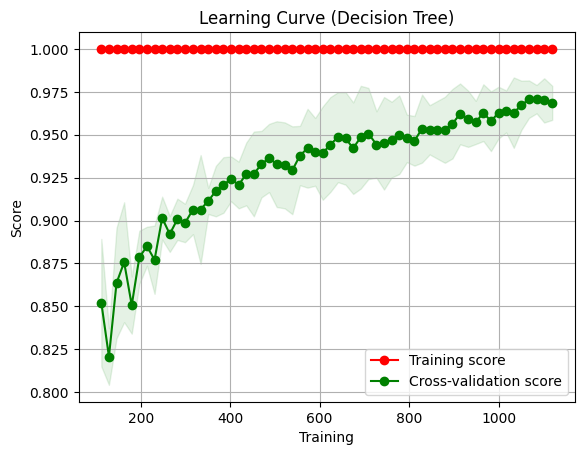

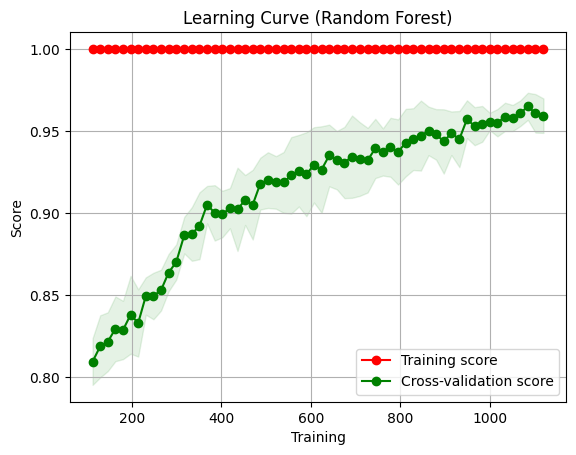

In [ ]:
# Gráfico para el Árbol de Decisión
plot_learning_curve_extended(dt_classifier, "Learning Curve (Decision Tree)", X_train, y_train, cv=5)
plt.show()

# Gráfico para Random Forest
plot_learning_curve_extended(rf_classifier, "Learning Curve (Random Forest)", X_train, y_train, cv=5)
plt.show()


Para el primer modelo, la puntuación de validación cruzada (Cross-validation score) aumenta con el número de ejemplos de entrenamiento y parece estar convergiendo hacia la puntuación de entrenamiento, aunque hay un espacio notable entre las dos líneas. Esto puede indicar un sobreajuste leve, ya que el modelo se desempeña perfectamente en los datos de entrenamiento pero no alcanza ese nivel en la validación cruzada. Para el segundo modelo, la puntuación de validación cruzada también mejora a medida que aumenta el número de ejemplos de entrenamiento y está más cerca de la puntuación de entrenamiento en comparación con el Árbol de Decisión, lo que sugiere un ajuste más generalizado y menos sobreajuste. Mientras que ambos modelos muestran un alto rendimiento en el conjunto de entrenamiento, el Random Forest parece generalizar mejor a nuevos datos, con un sobreajuste menos pronunciado en comparación con el Árbol de Decisión. Esto se refleja en la menor brecha entre las puntuaciones de entrenamiento y validación cruzada y la mayor estabilidad de las puntuaciones de validación cruzada a medida que aumenta el tamaño del conjunto de entrenamiento

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Los resultados obtenidos en la evaluación de los modelos, el Árbol de Decisión y el Random Forest, son en general satisfactorios, con altas tasas de precisión y tasas de verdaderos positivos (TP Rate) bastante equilibradas en la mayoría de las clases. Sin embargo, existen áreas de mejora que podrían considerarse para lograr un rendimiento aún mejor:

1. **Tuning de Hiperparámetros**: Se podría realizar una búsqueda exhaustiva de hiperparámetros para optimizar el rendimiento de los modelos. Ajustar parámetros como la profundidad máxima del árbol, el número de estimadores en el Random Forest o los criterios de división puede mejorar la precisión y reducir el sobreajuste.

2. **Feature Engineering**: Explorar la posibilidad de crear nuevas características derivadas de las existentes o realizar una selección más cuidadosa de características puede ayudar a capturar mejor las relaciones subyacentes en los datos.

3. **Balanceo de Clases**: Si el conjunto de datos tiene clases desequilibradas, se podría aplicar técnicas de balanceo de clases, como el sobremuestreo o submuestreo, para abordar este desequilibrio y mejorar la capacidad del modelo para clasificar clases minoritarias.

4. **Ensemble Learning**: Además del Random Forest, se podrían explorar otros métodos de ensemble learning, como Gradient Boosting o AdaBoost, que podrían ofrecer un mejor rendimiento.

5. **Validación Cruzada Mejorada**: Utilizar técnicas de validación cruzada más avanzadas, como la validación cruzada estratificada, para garantizar una evaluación más precisa de los modelos.

6. **Recopilación de Más Datos**: Si es posible, recopilar más datos de entrenamiento podría mejorar la capacidad de generalización de los modelos.

